## 1. Objective

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1. If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01. Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Each agent receives its own, local observation. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping.

The task is episodic, and in order to solve the environment, your agents must get an average score of +0.5 (over 100 consecutive episodes, after taking the maximum over both agents). Specifically,

- After each episode, we add up the rewards that each agent received (without discounting), to get a score for each agent. This yields 2 (potentially different) scores. We then take the maximum of these 2 scores.
- This yields a single score for each episode.

The environment is considered solved, when the average (over 100 episodes) of those scores is at least +0.5.

## 2. The Learning Algorithm: MADDPG

Multi-Agent Deep Deterministic Policy Gradients (MADDPG) is a multi-agent and off-policy algorithm that can be used in continuous action spaces. As with DDPG, MADDPG uses DQN's strategy of updating Target Networks as well as using a ReplayBuffer.

Implementation highlights:

1. Each agent (agent_p0,agent_p1) has its own Actor_Network, Actor_Target and Actor_Optimizer networks.

2. Each agent (agent_p0,agent_p1) has its own ReplayBuffer.

3. Both agents share a critic (mCritic) which has its own Actor_Network, Actor_Target and Actor_Optimizer.


## 3. Hyper-Parameters

BUFFER_SIZE    = int(1e6) # replay buffer size

BATCH_SIZE     = 1024      # minibatch size

GAMMA          = 0.99     # discount factor

TAU            = 2e-3     # for soft update of target parameters

LR_ACTOR       = 1e-3     # learning rate of the actor 

LR_CRITIC      = 1.1e-3     # learning rate of the critic

WEIGHT_DECAY   = 0.0001   # L2 weight decay

UPDATE_EVERY   = 5        # how often to update the network

EXPLORE_NOISE  = 0.05


FC1_UNITS      = 64

FC2_UNITS      = 512

FC3_UNITS      = 32

seed           = 0

state_size     = 24

action_size    = 2

num_agents     = 2

## 4. Model Architecture for Neural Networks

The model consists of three (3) neural networks, one each for the Agent_p0, Agent_p1 and sharedCritic.The model consists of three (3) linear layers.

#### Actor Network (agent_p0, agent_p1)

The first layer has an input-size of 24, equivalent to the number of variables (position, velocity, angular velocities of the arm) in the observation space. The output layer is 64.

The hidden layer has an input-size of 64 and an output size of 512 (I chose a size that was close to input_size*(input_size-1) or 552, to allow for as much pair-wise combination of inputs as possible)

The output size is set to two (2), equivalent to the action_size; with a TANH function to map the action space

#### Shared Critic Network

The first layer has an input-size of 24 + 2 = 26, equivalent to the number of variables (position, velocity, angular velocities of the arm) in the observation space AND the action_size. The output layer is 64.

The hidden layer has an input-size of 64 and an output size of 512 (I chose a size that was close to input_size*(input_size-1) or 650, to allow for as much pair-wise combination of inputs as possible)

The output size is set to one (1), representing a score/value that the critic uses to evaluate Actor performance

##### Agent_p0 Networks

ActorNetwork(

      (fc1): Linear(in_features=24, out_features=64, bias=True)
  
      (fc2): Linear(in_features=64, out_features=512, bias=True)
  
      (fc3): Linear(in_features=512, out_features=2, bias=True)

)

ActorNetwork(

      (fc1): Linear(in_features=24, out_features=64, bias=True)
      
      (fc2): Linear(in_features=64, out_features=512, bias=True)
      
      (fc3): Linear(in_features=512, out_features=2, bias=True)

)

##### Agent_p1 Networks

ActorNetwork(

    (fc1): Linear(in_features=24, out_features=64, bias=True)
  
    (fc2): Linear(in_features=64, out_features=512, bias=True)
  
    (fc3): Linear(in_features=512, out_features=2, bias=True)

)

ActorNetwork(

    (fc1): Linear(in_features=24, out_features=64, bias=True)

    (fc2): Linear(in_features=64, out_features=512, bias=True)
    
    (fc3): Linear(in_features=512, out_features=2, bias=True)

)

##### Shared Critic Networks

CriticNetwork(

    (fc1): Linear(in_features=26, out_features=64, bias=True)
    
    (fc2): Linear(in_features=64, out_features=512, bias=True)
    
    (fc3): Linear(in_features=512, out_features=1, bias=True)
)

CriticNetwork(

    (fc1): Linear(in_features=26, out_features=64, bias=True)
    
    (fc2): Linear(in_features=64, out_features=512, bias=True)
    
    (fc3): Linear(in_features=512, out_features=1, bias=True)

)

## 5. Number of Episodes to Solve the Environment

1. This took a *very* long time to solve on my personal workstation

2. Initial run (generating first checkpoint.pth file took ~24hours) 1600 episodes

3. I loaded this state dict and ran for another 24 hours

4. Therefore total episodes: 1600 + 3300 ~ 5000 episodes

Episode 100	Iterations: 100	Average Score: 0.09

Episode 200	Iterations: 200	Average Score: 0.18

Episode 300	Iterations: 300	Average Score: 0.19

Episode 400	Iterations: 400	Average Score: 0.12

Episode 500	Iterations: 500	Average Score: 0.15

Episode 600	Iterations: 600	Average Score: 0.07

Episode 700	Iterations: 700	Average Score: 0.10

Episode 800	Iterations: 800	Average Score: 0.08

Episode 900	Iterations: 900	Average Score: 0.08

Episode 1000	Iterations: 1000	Average Score: 0.04

Episode 1100	Iterations: 1100	Average Score: 0.08

Episode 1200	Iterations: 1200	Average Score: 0.11

Episode 1300	Iterations: 1300	Average Score: 0.11

Episode 1400	Iterations: 1400	Average Score: 0.11

Episode 1500	Iterations: 1500	Average Score: 0.11

Episode 1600	Iterations: 1600	Average Score: 0.12

Episode 1700	Iterations: 1700	Average Score: 0.17

Episode 1800	Iterations: 1800	Average Score: 0.14

Episode 1900	Iterations: 1900	Average Score: 0.17

Episode 2000	Iterations: 2000	Average Score: 0.18

Episode 2100	Iterations: 2100	Average Score: 0.18

Episode 2200	Iterations: 2200	Average Score: 0.11

Episode 2300	Iterations: 2300	Average Score: 0.10

Episode 2400	Iterations: 2400	Average Score: 0.09

Episode 2500	Iterations: 2500	Average Score: 0.12

Episode 2600	Iterations: 2600	Average Score: 0.27

Episode 2700	Iterations: 2700	Average Score: 0.56

Episode 2800	Iterations: 2800	Average Score: 0.27

Episode 2900	Iterations: 2900	Average Score: 0.29

Episode 3000	Iterations: 3000	Average Score: 0.41

Episode 3100	Iterations: 3100	Average Score: 0.14

Episode 3200	Iterations: 3200	Average Score: 0.08

Episode 3300	Iterations: 3300	Average Score: 0.24


##### Environment solved in 3288 episodes!	Average Score: 1.03

## 6. Plot of Rewards

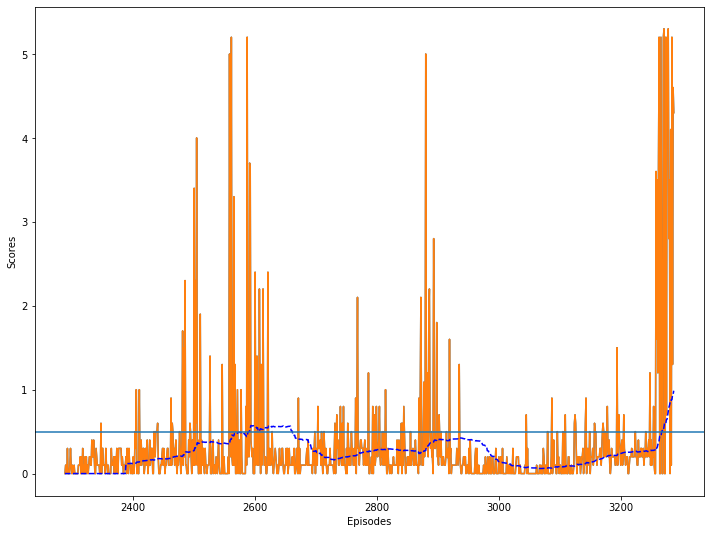

In [2]:
from IPython.display import Image
Image("scores.png")

## 7. Ideas for Future Work

0. This implementation used a Collaborative architecture with a Shared Critic

1. Replace shared critic with separate critic 

2. 